<a href="https://colab.research.google.com/github/JhonyMitis/Modelado_Simulacion/blob/master/Bifurcaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
fs = 1000
t = np.arange(-10,10,1/fs)
x = np.arange(-10,10,1/fs)
def dx(t,x):
    r = 1
    return 40*x - x**3

In [3]:
tol = 1e-12
def bisection(dx,x_m,x_p):
    diff = np.abs(x_m-x_p)
    f_x_p =  dx(x_p)

    while diff>tol: 
        x_next = (x_m + x_p)/2
        f_x_next =  dx(x_next)
        f_x_p =  dx(x_p)
        if f_x_next*f_x_p >0:
            x_p = x_next 
        else:
            x_m = x_next 
        diff = np.abs(x_m-x_p)
    return x_m

def find_all_zeros(dx,x_m,x_p):
    x_zeros = []
    x_zero = bisection(dx,x_m,x_p)
    while x_zero != x_m:
        x_zeros.append(x_zero)
        x_p = x_zero - tol
        x_zero = bisection(dx,x_m,x_p)
    return x_zeros

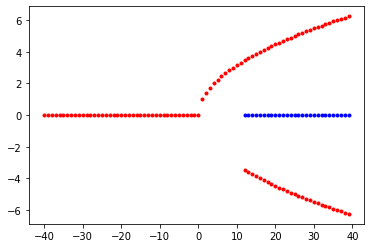

In [4]:
r = np.arange(-40,40,1)
for i in r:
    x_m = -10
    x_p = 10
    dx__ = lambda x: i*x - x**3
    zeros = find_all_zeros(dx__,x_m,x_p)
    for j in zeros:
        if dx__(j-tol)>dx__(j+tol):
            plt.plot(i,j,'r.')
        else:
            plt.plot(i,j,'b.')